In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 random values between 0 and 2


In [3]:
# Generate y without noise (perfect line)
y_perfect = 4 + 3 * X  

# Generate y with noise
y_noisy = 4 + 3 * X + np.random.randn(100, 1)  # Adding Gaussian noise

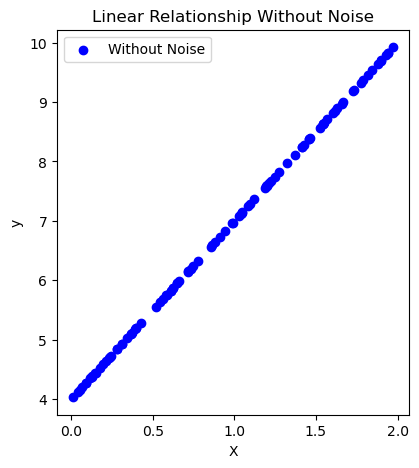

In [4]:
# Plot both datasets
plt.figure(figsize=(10, 5))

# Plot without noise
plt.subplot(1, 2, 1)
plt.scatter(X, y_perfect, color='blue', label="Without Noise")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Relationship Without Noise")
plt.legend()
plt.show()

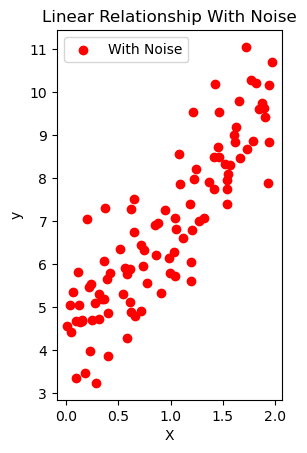

In [5]:
# Plot with noise
plt.subplot(1, 2, 2)
plt.scatter(X, y_noisy, color='red', label="With Noise")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Relationship With Noise")
plt.legend()
plt.show()


# **Mean Squared Error (MSE) in Linear Regression**

## **What is Mean Squared Error (MSE)?**
Mean Squared Error (MSE) is a commonly used loss function in **Linear Regression**, which measures the average squared difference between the actual and predicted values.

### **Mathematical Formula**
The **MSE** is defined as:

$$
J(\theta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

Where:
- \( J(\theta) \) represents the **cost function**.
- \( n \) is the **number of data points**.
- \( y_i \) is the **actual value** of the target variable.
- \( \hat{y_i} \) is the **predicted value**, given by:

  $$
  \hat{y_i} = \theta_0 + \theta_1 X_i
  $$

### **Why Use MSE?**
- **Penalizes Large Errors**: Squaring the differences ensures that larger errors contribute more to the loss.
- **Smooth Optimization**: The function is differentiable, making it ideal for optimization algorithms like **Gradient Descent**.
- **Minimization Objective**: The goal of training a **Linear Regression** model is to find the parameters \( \theta_0, \theta_1 \) that minimize **MSE**.

### **Gradient Descent Update Rule**
To minimize **MSE**, we use **Gradient Descent** to update the parameters:

$$
\theta_j := \theta_j - \alpha \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i}) X_{ij}
$$

Where:
- \( \alpha \) is the **learning rate**.
- \( \theta_j \) represents the parameters (weights).

### **Key Takeaways**
✅ MSE measures how well the model's predictions match actual values.  
✅ The goal of **Linear Regression** is to minimize MSE.  
✅ Gradient Descent optimizes **MSE** by updating parameters iteratively.  

---

In [6]:
def gradient_descent(X, y, learning_rate=0.1, epochs=1000):
    """
    Implements gradient descent for Linear Regression.
    X: Feature matrix
    y: Target variable
    learning_rate: Step size for parameter updates
    epochs: Number of iterations
    
    Returns: Optimized theta (parameters) and cost history
    """
    n = len(y)  # Number of training samples
    X_b = np.c_[np.ones((n, 1)), X]  # Add bias term (column of ones)
    theta = np.random.randn(2, 1)  # Random initialization
    cost_history = []

    for epoch in range(epochs):
        gradients = 2/n * X_b.T.dot(X_b.dot(theta) - y)  # Compute gradients
        theta -= learning_rate * gradients  # Update parameters

        # Compute Mean Squared Error (MSE) as cost
        cost = (1/(2*n)) * np.sum((X_b.dot(theta) - y) ** 2)
        cost_history.append(cost)

    return theta, cost_history

Optimized Parameters (Theta) from Gradient Descent: [4.21509616 2.77011339]


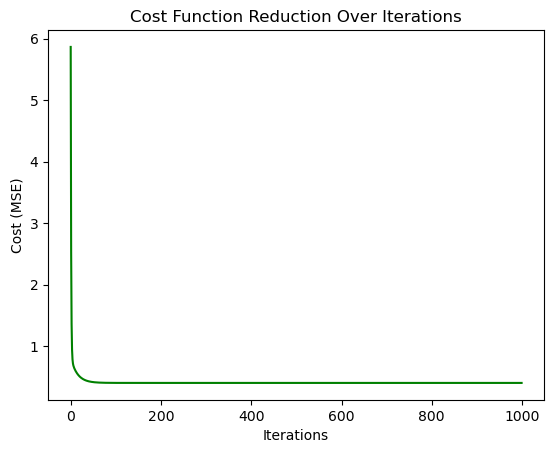

In [7]:
# Train using data WITH noise
theta_gd, cost_history = gradient_descent(X, y_noisy, learning_rate=0.1, epochs=1000)

print(f"Optimized Parameters (Theta) from Gradient Descent: {theta_gd.ravel()}")

# Plot cost function over iterations
plt.plot(range(len(cost_history)), cost_history, color='green')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Reduction Over Iterations")
plt.show()

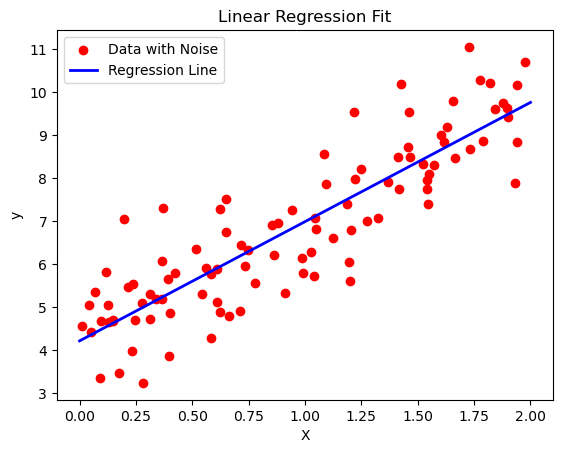

In [8]:
# Make predictions
X_new = np.array([[0], [2]])  # Test input
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add bias term
y_pred = X_new_b.dot(theta_gd)  # Compute predictions

# Plot data points and regression line
plt.scatter(X, y_noisy, color='red', label="Data with Noise")
plt.plot(X_new, y_pred, color='blue', linewidth=2, label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()